In [38]:
# General import and load data
import pandas as pd
import numpy as np
import json
from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB


# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, make_scorer

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)


# if matplotlib is not set inline, you will not see plots
# alternatives auto gtk gtk2 inline osx qt qt5 wx tk
# %matplotlib auto
# %matplotlib qt
%matplotlib inline
%run plot_learning_curve

# Step 1: Labelling

As the machine learning algorithms that we are going to apply are supervised, they need a source of labelled documents to learn how to categorize the documents that come without labelling. For that purpose we have implemented a labelling script that categorizes the tweets as healthy or unhealthy from a nutrition perspective. To do so, the script checks  the different nutritient values that have been extracted for each tweet and based on a series of thresholds established after exhaustive research labels the tweets as healthy or unhealthy. 

In [ ]:
df = pd.read_csv('Dataset.csv')

In [25]:
time=[]
day = []
for i in df['created_at']:
    time.append(i.split(' ')[1].split('.')[0])
    day.append(i.split(' ')[0].split('-')[2])
df['created_at']=time
df['day']= day

In [ ]:
df['Categorías'][df.Categorías.isna()]="['Unspecified']"

In [ ]:
categorias = df['Categorías'][5].split(', ')
categoriasLimpias = []
for i in categorias:
    categoriasLimpias.append(i.replace("[","").replace("'","").replace("]",""))
categoriasLimpias

In [ ]:
health=[]
n = 0
nCal = 0
nH = 0
nP = 0
nG = 0
nC = 0
nFib = 0
for i in range(len(df['Calorias'])):
    if (df['Categorías'][i].split(', ')[0].replace("[","").replace("'","").replace("]","") == 'Vegetales' or df['Categorías'][i].split(', ')[0].replace("[","").replace("'","").replace("]","") == 'Frutas' or df['Categorías'][i].split(', ')[0].replace("[","").replace("'","").replace("]","") == 'Legumbres' or df['Categorías'][i].split(', ')[0].replace("[","").replace("'","").replace("]","") == 'Frutos secos' or df['Categorías'][i].split(', ')[0].replace("[","").replace("'","").replace("]","") == 'Hierbas y especias' or df['Categorías'][i].split(', ')[0].replace("[","").replace("'","").replace("]","") == 'Bebidas' or df['Categorías'][i].split(', ')[0].replace("[","").replace("'","").replace("]","") == 'Bebidas Alcoholicas' ) and len(df['Categorías'][i].split(', ')) == 1:
        health.append(0)
        print(0)
        print(i)
        continue
    else:
        if int(df['created_at'][i].split(':')[0]) >= 6 and int(df['created_at'][i].split(':')[0]) <= 10:
            if float(df['Calorias'][i])<380 or float(df['Calorias'][i])>480:
                nCal = nCal+1
                n = n+1
            if float(df['Hidratos de Carbono'][i])<63 or float(df['Hidratos de Carbono'][i])>72:
                nH = nH+1
                n = n+1
            if float(df['Proteinas'][i]) < 2 or float(df['Proteinas'][i]) > 5:
                nP = nP+1
                n = n+1
            if float(df['Grasas'][i]) > 2:
                nG = nG+1
                n = n+1
            if float(df['Colesterol'][i]) > 60:
                nC = nC+1
                n = n+1
            if float(df['Fibra'][i]) < 2 or float(df['Fibra'][i]) > 10:
                nFib = nFib+1
                n = n+1

        elif int(df['created_at'][i].split(':')[0]) >= 11 and int(df['created_at'][i].split(':')[0]) < 13:
            if float(df['Calorias'][i])<150 or float(df['Calorias'][i])>280:
                nCal = nCal+1
                n = n+1
            if float(df['Hidratos de Carbono'][i])<36 or float(df['Hidratos de Carbono'][i])>45:
                nH = nH+1
                n = n+1
            if float(df['Proteinas'][i]) < 8 or float(df['Proteinas'][i]) > 14.5:
                nP = nP+1
                n = n+1
            if float(df['Grasas'][i]) > 2:
                nG = nG+1
                n = n+1
            if float(df['Colesterol'][i]) > 60:
                nC = nC+1
                n = n+1
            if float(df['Fibra'][i]) < 2 or float(df['Fibra'][i]) > 10:
                nFib = nFib+1
                n = n+1

        elif int(df['created_at'][i].split(':')[0]) >= 13 and int(df['created_at'][i].split(':')[0]) < 16:
            if float(df['Calorias'][i])<380 or float(df['Calorias'][i])>480:
                nCal = nCal+1
                n = n+1
            if float(df['Hidratos de Carbono'][i])<23 or float(df['Hidratos de Carbono'][i])>31:
                nH = nH+1
                n = n+1
            if float(df['Proteinas'][i]) < 26 or float(df['Proteinas'][i]) > 34:
                nP = nP+1
                n = n+1
            if float(df['Grasas'][i]) > 2:
                nG = nG+1
                n = n+1
            if float(df['Colesterol'][i]) > 60:
                nC = nC+1
                n = n+1
            if float(df['Fibra'][i]) < 3 or float(df['Fibra'][i]) > 10:
                nFib = nFib+1
                n = n+1

        elif int(df['created_at'][i].split(':')[0]) >= 16 and int(df['created_at'][i].split(':')[0]) <= 19:
            if float(df['Calorias'][i])<280 or float(df['Calorias'][i])>380:
                nCal = nCal+1
                n = n+1
            if float(df['Hidratos de Carbono'][i])>8:
                nH = nH+1
                n = n+1
            if float(df['Proteinas'][i]) < 8 or float(df['Proteinas'][i]) > 14.5:
                nP = nP+1
                n = n+1
            if float(df['Grasas'][i]) < 18 or float(df['Grasas'][i]) > 24:
                nG = nG+1
                n = n+1
            if float(df['Colesterol'][i]) > 60:
                nC = nC+1
                n = n+1
            if float(df['Fibra'][i]) < 2 or float(df['Fibra'][i]) > 10:
                nFib = nFib+1
                n = n+1

        elif int(df['created_at'][i].split(':')[0]) >= 20 and int(df['created_at'][i].split(':')[0]) <= 23:
            if float(df['Calorias'][i])<280 or float(df['Calorias'][i])>380:
                nCal = nCal+1
                n = n+1
            if float(df['Hidratos de Carbono'][i])>8:
                nH = nH+1
                n = n+1
            if float(df['Proteinas'][i]) < 14.5 or float(df['Proteinas'][i]) > 23:
                nP = nP+1
                n = n+1
            if float(df['Grasas'][i]) < 35 or float(df['Grasas'][i]) > 43:
                nG = nG+1
                n = n+1
            if float(df['Colesterol'][i]) > 60:
                nC = nC+1
                n = n+1
            if float(df['Fibra'][i]) < 2 or float(df['Fibra'][i]) > 10:
                nFib = nFib+1
                n = n+1
        else:
            if float(df['Calorias'][i])>280:
                nCal = nCal+1
                n = n+1
            if float(df['Hidratos de Carbono'][i])>15:
                nH = nH+1
                n = n+1
            if float(df['Proteinas'][i]) < 2 or float(df['Proteinas'][i]) > 5:
                nP = nP+1
                n = n+1
            if float(df['Grasas'][i]) < 35 or float(df['Grasas'][i]) > 43:
                nG = nG+1
                n = n+1
            if float(df['Colesterol'][i]) > 60:
                nC = nC+1
                n = n+1
            if float(df['Fibra'][i]) < 2 or float(df['Fibra'][i]) > 10:
                nFib = nFib+1
                n = n+1
        if (nCal == 1 and nG == 1 and nH == 1) or n > 4 :
            health.append(1)
        else:
            health.append(0)
        print(n)
        n = 0
        nCal = 0
        nH = 0            
        nP = 0
        nG = 0
        nC = 0
        nFib = 0
        
    
df['Health'] = health

In [ ]:
df.to_csv('PruebaSVM.csv')

# Step 2: Preprocessing 

After labelling some tweets, they must be preprocessed before being used as an input for the machine learning algorithms. Some of the features extracted in the previous notebook are not in the appropriate format for its evaluation. The features must be in a numeric format, and for that purpose the Gender and the Sentiment extracted will be transformed. 

Once this is done, we check that all the fields are numeric and that there is no missing values in any column.

In [121]:
# We get a URL with raw content (not HTML one)
df = pd.read_csv('PruebaSVM.csv')
df.head()

# Fill missing values
df['Gender'].fillna('unspecified', inplace=True)
# Encode categorical variables
df.loc[df["sentiment"] == "Positive", "sentiment"] = 0
df.loc[df["sentiment"] == "Negative", "sentiment"] = 1
df.loc[df["sentiment"] == "Neutral", "sentiment"] = 2
df.loc[df["Gender"] == "male", "Gender"] = 0
df.loc[df["Gender"] == "female", "Gender"] = 1
df.loc[df["Gender"] == "unspecified", "Gender"] = 2
# Drop colums
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1','Unnamed: 0.1.1.1.1.1','Unnamed: 0.1.1.1.1.1.1','Unnamed: 0.1.1.1.1.1.1.1','Unnamed: 0.1.1.1.1.1.1.1','Unnamed: 0.1.1.1.1.1.1.1.1','City','place','Coordinates','day','Categorías','lang','text','user','IsFood','Foods','Country'], axis=1, inplace=True)

# Show preprocessed df
df.count()

FileNotFoundError: File b'PruebaSVM.csv' does not exist

In [75]:
df[(df.sentiment == 1)]

,Calorias,Colesterol,ComunidadAutonoma,Fibra,Gender,Grasas,Hidratos de Carbono,Proteinas,created_at,id,id_str,sentiment,Health
530,36.000,7.00,Cataluña,0.00,0,2.3654,2.45,1.70,18,1.120039e+18,1.120039e+18,1,0
653,337.000,0.00,Castilla la Mancha,11.20,2,1.7000,55.40,23.40,10,1.114113e+18,1.114113e+18,1,0
753,252.000,30.00,Madrid,4.58,0,2.2600,47.44,9.35,12,1.114149e+18,1.114149e+18,1,0
822,271.330,20.00,Madrid,0.53,2,30.5300,59.23,7.29,14,1.114175e+18,1.114175e+18,1,1
975,271.330,20.00,Galicia,0.53,1,30.5300,59.23,7.29,18,1.114235e+18,1.114235e+18,1,1
1031,333.000,0.00,Aragón,11.20,1,1.7000,54.80,23.00,19,1.114254e+18,1.114254e+18,1,0
1121,252.000,30.00,Andalucía,4.58,2,2.2600,47.44,9.35,21,1.114281e+18,1.114281e+18,1,1
1149,166.000,99.00,Madrid,0.00,2,9.6000,0.00,19.90,22,1.114288e+18,1.114288e+18,1,0
1198,43.000,0.00,Madrid,2.60,1,0.2000,7.55,2.80,0,1.114317e+18,1.114317e+18,1,0
1229,65.000,14.00,Cataluña,0.00,0,3.8000,4.70,3.06,6,1.114418e+18,1.114418e+18,1,1


In [18]:
# Check types are numeric
df.dtypes

Calorias               float64
Colesterol             float64
ComunidadAutonoma       object
Fibra                  float64
Gender                   int64
Grasas                 float64
Hidratos de Carbono    float64
Proteinas              float64
created_at              object
id                     float64
id_str                 float64
sentiment                int64
Health                   int64
dtype: object

In [19]:
# Check there are not missing values
df.isnull().any()

Calorias               False
Colesterol             False
ComunidadAutonoma      False
Fibra                  False
Gender                 False
Grasas                 False
Hidratos de Carbono    False
Proteinas              False
created_at             False
id                     False
id_str                 False
sentiment              False
Health                 False
dtype: bool

In [120]:
df[df.created_at == 0].count()

Calorias               158
Colesterol             158
ComunidadAutonoma      158
Fibra                  158
Gender                 158
Grasas                 158
Hidratos de Carbono    158
Proteinas              158
created_at             158
id                     158
id_str                 158
sentiment              158
Health                 158
dtype: int64

# Step 3: Applying Machine Learning Algorithms

In this step we will apply to our dataset three different machine learning algorithms to see what kind of algorithm obtains better evaluation results. To select the algorithm we have to check which hyperparameters give the best results with each one of them. First we must divide between training set and test set.

In [76]:
# Features of the model
features = ['Calorias' , 'Hidratos de Carbono' , 'Grasas' , 'Proteinas' , 'Colesterol' , 'Fibra','created_at','Gender']
# Transform dataframe in numpy arrays
X = df[features].values
y = df['Health'].values



# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Preprocess: normalize
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
X_train = df[features][df.ComunidadAutonoma != 'Andalucía'].values
X_test = df[features][df.ComunidadAutonoma == 'Andalucía'].values
y_train = df['Health'][df.ComunidadAutonoma != 'Andalucía'].values
y_test = df['Health'][df.ComunidadAutonoma == 'Andalucía'].values

Then we apply the first algorithm which is gonna be Multinomial Naive-Bayes. This is an implementation of the scikit learn MultinomialNB algorithm.

In [77]:
from sklearn.model_selection import GridSearchCV
#Optimize multinomialNB
NB = MultinomialNB(alpha=.001)

parametersNB = {'alpha': [.0001,.001,.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gs_NB = GridSearchCV(NB, parametersNB, n_jobs=-1)

In [78]:
gs_NB = gs_NB.fit(X, y)


In [79]:
print("Best Score with MultinomialNB: %s" % gs_NB.best_score_)
for param_name in sorted(parametersNB.keys()):
    print("%s: %r" % (param_name, gs_NB.best_params_[param_name]))

Best Score with MultinomialNB: 0.6552870090634441
alpha: 0.0001


In [80]:
#Evaluate with K-Fold
model_NB = MultinomialNB(alpha=gs_NB.best_params_['alpha'] )
cv = KFold(n_splits=5, shuffle=False, random_state=33)
scores = cross_val_score(model_NB, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores in every iteration [0.66163142 0.63293051 0.63343404 0.67573011 0.67321249]
Accuracy: 0.66 (+/- 0.04)


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

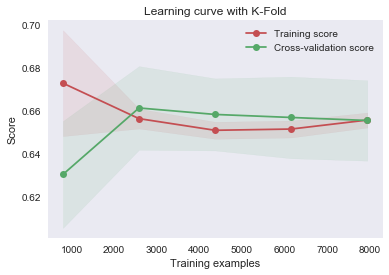

In [81]:
plot_learning_curve(model_NB, "Learning curve with K-Fold", X, y, cv=cv)

In [82]:
def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [83]:
# Nested CV with parameter optimization
nested_score = cross_val_score(model_NB, X, y, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

             precision    recall  f1-score   support

          0       0.62      0.84      0.71       983
          1       0.76      0.48      0.59      1003

avg / total       0.69      0.66      0.65      1986

             precision    recall  f1-score   support

          0       0.55      0.82      0.66       864
          1       0.78      0.49      0.60      1122

avg / total       0.68      0.63      0.63      1986

             precision    recall  f1-score   support

          0       0.58      0.77      0.66       913
          1       0.73      0.51      0.60      1073

avg / total       0.66      0.63      0.63      1986

             precision    recall  f1-score   support

          0       0.62      0.80      0.70       922
          1       0.77      0.57      0.65      1064

avg / total       0.70      0.68      0.67      1986

             precision    recall  f1-score   support

          0       0.63      0.80      0.71       982
          1       0.74      0.55 

The next algorithm we are going to try is the Linear Support Vector Classification algorithm. This algorithm is an implementation of the scikit learn SVC algorithm based on liblinear library instead of libsvm.

In [84]:
from sklearn.model_selection import GridSearchCV

#Optimize SVC
LSVC = LinearSVC(C=1)

parametersLSVC = {'C':range(1,15),'tol':[.0000001,.000001,.00001,.0001,.001,.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gs_LSVC = GridSearchCV(LSVC, parametersLSVC, n_jobs=-1)

In [85]:
gs_LSVC= gs_LSVC.fit(X,y)

In [86]:
print("Best Score with LinearSVC: %s" % gs_LSVC.best_score_)
for param_name in sorted(parametersLSVC.keys()):
    print("%s: %r" % (param_name, gs_LSVC.best_params_[param_name]))

Best Score with LinearSVC: 0.7440080563947633
C: 9
tol: 0.01


In [87]:
#Evaluate with K-Fold
C_LSVC=gs_LSVC.best_params_['C']

model_LSVC = LinearSVC(C=C_LSVC)
scores = cross_val_score(model_LSVC, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores in every iteration [0.6858006  0.67170191 0.72910373 0.67975831 0.73564955]
Accuracy: 0.70 (+/- 0.05)


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

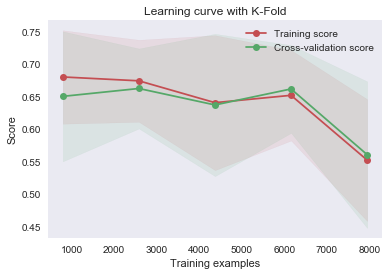

In [88]:
plot_learning_curve(model_LSVC, "Learning curve with K-Fold", X, y, cv=cv)

In [89]:
# Nested CV with parameter optimization
nested_score = cross_val_score(model_LSVC, X, y, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score)

             precision    recall  f1-score   support

          0       0.75      0.68      0.71       983
          1       0.71      0.77      0.74      1003

avg / total       0.73      0.73      0.73      1986

             precision    recall  f1-score   support

          0       0.58      0.79      0.67       864
          1       0.77      0.56      0.65      1122

avg / total       0.69      0.66      0.65      1986

             precision    recall  f1-score   support

          0       0.98      0.28      0.43       913
          1       0.62      0.99      0.76      1073

avg / total       0.78      0.67      0.61      1986

             precision    recall  f1-score   support

          0       0.67      0.70      0.68       922
          1       0.73      0.70      0.71      1064

avg / total       0.70      0.70      0.70      1986

             precision    recall  f1-score   support

          0       0.51      0.97      0.67       982
          1       0.72      0.08 

The last classifier we will be testing is the K-Nearest Neighbors classifier implemented in scikit learn.

In [90]:
from sklearn.neighbors import KNeighborsClassifier

#Optimize KNeighborsClassifier
KN = KNeighborsClassifier(n_neighbors=3)
parametersKN = {'n_neighbors': range(1,15), 'p':(1,2),'algorithm':('ball_tree', 'kd_tree', 'brute')}

gs_KN = GridSearchCV(KN, parametersKN, n_jobs=-1)


In [91]:
gs_KN= gs_KN.fit(X,y)

In [92]:
print("Best Score with KN: %s" % gs_KN.best_score_)
for param_name in sorted(parametersKN.keys()):
    print("%s: %r" % (param_name, gs_KN.best_params_[param_name]))

Best Score with KN: 0.9172205438066465
algorithm: 'ball_tree'
n_neighbors: 1
p: 2


In [93]:
#Evaluate with K-Fold
model_KN =KNeighborsClassifier(gs_KN.best_params_['n_neighbors'])
scores = cross_val_score(model_KN, X, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores in every iteration [0.89123867 0.90231621 0.94209466 0.94813696 0.94511581]
Accuracy: 0.93 (+/- 0.05)


In [94]:
# Nested CV with parameter optimization
nested_score = cross_val_score(model_KN, X, y, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
print (nested_score) 

             precision    recall  f1-score   support

          0       0.87      0.92      0.89       983
          1       0.92      0.86      0.89      1003

avg / total       0.89      0.89      0.89      1986

             precision    recall  f1-score   support

          0       0.92      0.85      0.88       864
          1       0.89      0.94      0.92      1122

avg / total       0.90      0.90      0.90      1986

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       913
          1       0.94      0.95      0.95      1073

avg / total       0.94      0.94      0.94      1986

             precision    recall  f1-score   support

          0       0.96      0.93      0.94       922
          1       0.94      0.96      0.95      1064

avg / total       0.95      0.95      0.95      1986

             precision    recall  f1-score   support

          0       0.96      0.93      0.94       982
          1       0.93      0.96 